In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import spacy
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\velyd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\velyd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\velyd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# CSV dosyalarını oku
train_df = pd.read_csv("Corona_NLP_train.csv", encoding='latin1')
test_df = pd.read_csv("Corona_NLP_test.csv", encoding='latin1')

print(train_df.head())
print(train_df.columns)


   UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative  
Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')


In [3]:
import re

def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # HTML Etiketleri
    text = re.sub(r'http\S+|www\S+', '', text)  # URL'ler
    text = re.sub(r'\d+', '', text)  # Sayılar
    text = re.sub(r'[^\w\s]', '', text)  # Noktalama
    text = text.lower()  # Küçük harfe çevir
    return text

train_df['cleaned_text'] = train_df['OriginalTweet'].apply(clean_text)
test_df['cleaned_text'] = test_df['OriginalTweet'].apply(clean_text)

print(train_df[['OriginalTweet', 'cleaned_text']].head())


                                       OriginalTweet  \
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   
1  advice Talk to your neighbours family to excha...   
2  Coronavirus Australia: Woolworths to give elde...   
3  My food stock is not the only one which is emp...   
4  Me, ready to go at supermarket during the #COV...   

                                        cleaned_text  
0            menyrbie phil_gahan chrisitv  and  and   
1  advice talk to your neighbours family to excha...  
2  coronavirus australia woolworths to give elder...  
3  my food stock is not the only one which is emp...  
4  me ready to go at supermarket during the covid...  


In [4]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]  # Stopwords kaldır
    # print(f"Tokens after removing stopwords: {tokens}")
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    # print(f"Tokens after lemmatization: {tokens}")
    tokens = [stemmer.stem(word) for word in tokens]  # Stemming
    return " ".join(tokens)

train_df['processed_text'] = train_df['cleaned_text'].apply(preprocess_text)
test_df['processed_text'] = test_df['cleaned_text'].apply(preprocess_text)

print(train_df[['cleaned_text', 'processed_text']].head())


                                        cleaned_text  \
0            menyrbie phil_gahan chrisitv  and  and    
1  advice talk to your neighbours family to excha...   
2  coronavirus australia woolworths to give elder...   
3  my food stock is not the only one which is emp...   
4  me ready to go at supermarket during the covid...   

                                      processed_text  
0                        menyrbi phil_gahan chrisitv  
1  advic talk neighbour famili exchang phone numb...  
2  coronaviru australia woolworth give elderli di...  
3  food stock one empti pleas dont panic enough f...  
4  readi go supermarket covid outbreak im paranoi...  


In [5]:
# TF-IDF Vektörizasyon
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_df['processed_text'])
X_test = tfidf.transform(test_df['processed_text'])

y_train = train_df['Sentiment']
y_test = test_df['Sentiment']


In [6]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

print("Naive Bayes:")
print(classification_report(y_test, y_pred_nb))


Naive Bayes:
                    precision    recall  f1-score   support

Extremely Negative       0.72      0.15      0.25       592
Extremely Positive       0.81      0.20      0.31       599
          Negative       0.42      0.54      0.47      1041
           Neutral       0.59      0.35      0.44       619
          Positive       0.37      0.71      0.49       947

          accuracy                           0.44      3798
         macro avg       0.58      0.39      0.39      3798
      weighted avg       0.54      0.44      0.41      3798



In [7]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Lojistik Regresyon:")
print(classification_report(y_test, y_pred_lr))


Lojistik Regresyon:
                    precision    recall  f1-score   support

Extremely Negative       0.64      0.47      0.54       592
Extremely Positive       0.70      0.53      0.60       599
          Negative       0.51      0.52      0.52      1041
           Neutral       0.60      0.66      0.63       619
          Positive       0.49      0.62      0.55       947

          accuracy                           0.56      3798
         macro avg       0.59      0.56      0.57      3798
      weighted avg       0.57      0.56      0.56      3798



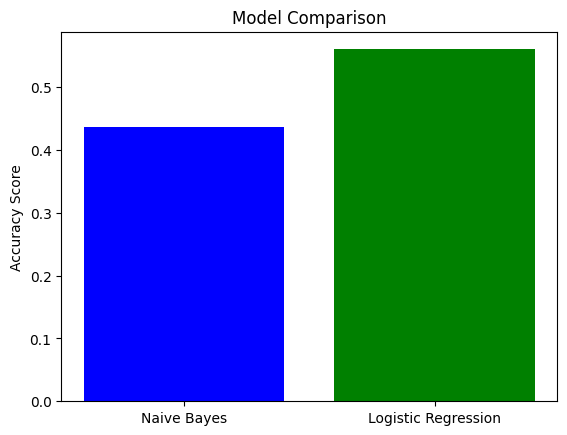

In [8]:
models = ['Naive Bayes', 'Logistic Regression']
accuracy = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_lr)]

plt.bar(models, accuracy, color=['blue', 'green'])
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.show()
